In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_colwidth', -1)

plt.style.use('ggplot')

# formulas to be used in data analysis phase

def transform_likely(x):
    if x == 'Have not used theses services':
        return 0
    elif x == 'Extremely unlikely':
        return 1
    elif x == 'Unlikely':
        return 2
    elif x == 'Neutral':
        return 3
    elif x == 'Likely':
        return 4
    else:
        return 5

    
def rank_1to5(x):
    if x == '1':
        return 5
    elif x == '2':
        return 4
    elif x == '3':
        return 3
    elif x == '4':
        return 2
    else:
        return 1
    

def rank_1to4(x):
    if x == '1':
        return 4
    elif x == '2':
        return 3
    elif x == '3':
        return 2
    else:
        return 1
    
    
def transform_acceptable(x):
    if x == 'I dont know':
        return 0
    elif x == 'Totally unacceptable':
        return 1
    elif x == 'Slightly acceptable':
        return 2
    elif x == 'Neutral':
        return 3
    elif x == 'Acceptable':
        return 4
    else:
        return 5
    
    
def transform_agree(x):
    if x == 'I dont know':
        return 0
    elif x == 'Strongly disagree':
        return 1
    elif x == 'Disagree':
        return 2
    elif x == 'Neither agree or disagree':
        return 3
    elif x == 'Agree':
        return 4
    else:
        return 5
    
    
    
    

In [2]:
path = 'C:/Users/Bruno Henderyckx/Desktop/Endeavour/Data refresh 0801/CSV/Participant Survey.csv'
df = pd.read_csv(path)
df = df.drop([0])
df = df.drop(columns=['First Name','Last Name','Custom Data 1'])

# drop all the entries where there are too many question skips
df = df.loc[df.count(1)>10]

# Rename the columns
df.columns = [
'Respondent ID',
 'Collector ID',
 'Start Date',
 'End Date',
 'IP Address',
 'Email Address',
 'Please tell us which describes your occupation most closely (what takes up most of your hours in the day).',
 'Are there any other mental health support organizations that you rely on for mental illness support?',
 'What are they?',
 'Social outings',
 'Art therapy',
 'Family support group',
 'Cooking group & community lunch',
 'Yoga/fitness',
 'Robert Veltheer Lecture Series on Mental Illness',
 'Supportive housing program',
 'Advocacy for communication/services',
 'My social support needs as a caregiver are being met.',
 'My emotional well-being needs as a caregiver are being met.',
 'I am able to navigate the mental health system more easily.',
 'Other (please specify)',
 'Social outings',
 'Art therapy',
 'Family support group',
 'Cooking group & community lunch',
 'Yoga/fitness',
 'Robert Veltheer Lecture Series on Mental Illness',
 'Supportive housing program',
 'Advocacy for communication/ services',
 'There is enough focus on the specific mental illness of my loved one.',
 'There is enough focus on a recovery-oriented system encouraging partnerships with service providers and families.',
 'There is enough focus on mental health promotion - strategies through multi-level interventions for reducing risk factors for poor mental health.',
 'There is enough focus on mental health promotion - strategies for engaging with people to empower them to improve their health.',
 'Web self-help group/ chat room',
 'In person self-help group.',
 'A self-help phone service.',
 'Other (please specify):',
 'Helping me navigate\xa0the mental health system and/or finding a social worker',
 'Finding a psychiatrist or another health professional',
 'Providing support services at home.',
 'Providing a social outlet for my loved one.',
 'Providing more social outings that are fun.',
 'Helping me find friends for my loved one.',
 'Helping my loved one learn new skills.',
 'Helping my loved one become more independent.',
 'Providing more support services at home.',
 'Supportive housing - housing units with customized services (housing units are not customized)',
 'Supportive housing - housing units with customized services (housing units are customized)',
 'Supported housing - long term support housing with services provided to client in their home.',
 'Semi-independent living - programs focusing on teaching skills for increasing self-esteem and independence.',
 'Harm reduction housing - providing links to support programs/health care workers regardless of whether client is receiving treatment.',
 'Navigation mental health system tools',
 'Copies of Robert Veltheer Lecture Series on Mental Illness and/or recordings',
 'Family psycho-education tools',
 'Intervention methods',
 'Medication compliance tools',
 'Link to one stop shop directory',
 'Better site organization',
 'Information about specific mental health disorders',
 'Other (please specify)',
 'How would you like your skills utilized in contributing to the development of Home on the Hill?',
 'How did you first hear of Home on the Hill?',
 'Unnamed: 65',
 'Please rate how likely you would recommend Home on the Hill to a fellow caregiver?',
 'Please tell us which age group you belong to.',
 'Please tell us\xa0only the first three digits of your postal code.',
 'To feel safe',
 'To feel like I belong',
 'To have better self-esteem',
 'To become more independent',
 'To help me find more friends',
 'To help me have fun',
 'To help me become more independent',
 'To help me feel safe.',
 'To help me find help',
 'Social outings',
 'Art therapy',
 'Family support group',
 'Cooking group and community lunch',
 'Yoga & fitness',
 'Robert Veltheer lecture series on mental illness',
 'Supportive housing program',
 'Advocacy for communication or service',
 'Web self-help group/ chat room',
 'In person self-help groups.',
 'A self-help phone service.',
 'Other (please specify)',
 'Navigation mental health system tools',
 'Copies of Robert Veltheer Lecture Series on Mental Illness and/or recordings',
 'Family psycho-education tools',
 'Intervention methods',
 'Medication compliance tools',
 'Link to one stop shop directory',
 'Better site organization',
 'Information about specific mental health disorders',
 'Other (Please specify)',
 'How would you like your skills utilized in contributing to the development of Home on the Hill?.1',
 'How did you hear of Home on the Hill?',
 'Other (Please specify)',
 'Please rate how likely you would recommend Home on the Hill to a fellow\xa0loved one?',
 'Please tell us which age group you belong to..1',
 'Please tell us\xa0only the first three digits of your postal code..1',
 'Family Physicians',
 'Social media',
 'High schools/ universities/ colleges',
 'Hospitals',
 'Connecting the organization at the point of patient discharge in the event of a hospitalization.',
 'Connecting caregivers to medical professionals in an inclusive circle of care with family members.',
 'Enabling family physicians with early screening tools for mental illness through outreach.',
 'Changing patient confidentiality regulations to enable a more inclusive circle of care for their caregivers.',
 'An "in-reach" program set up by Home on the Hill at the hospital advising participants about various community support programs.',
 'Delivering public awareness campaigns with information about the signs and symptoms of adult-onset mental illness.',
 'Delivering campaigns in high schools and universities with information about the signs and symptoms of adult-onset mental illness.',
 'Delivering campaigns in hospitals about the signs and symptoms of adult-onset mental illness.',
 'Delivering campaigns to family physicians offices about the signs and symptoms of adult-onset mental illness with a caregiving focus.',
 'Delivering campaigns to psychiatrists about managing signs and symptoms of adult-onset mental illness with a caregiving focus.',
 'Respite care for caregivers',
 'Support and social programs for ill clients',
 'Advocacy through Robert Veltheer Lecture Series',
 'Supportive housing',
 'Navigation tools for the mental health system in Richmond Hill',
 'Home on the Hill is striving to address the gap between the recovery model of the loved ones right to choose and the medical model of whats the right treatment for them in order to recover. In your opinion, are there any other services we could provide that we are missing?',
 'How did you hear of Home on the Hill?.1',
 'Other (Please specify)',
 'Please rate how likely you would recommend Home on the Hill to a fellow\xa0professional?',
 'Please tell us your level of professional experience.',
 'Please tell us the industry/organization where you work:',
 'Please tell us only the first three digits of your postal code..'
]



<h1>Question 1</h1>
<br>
<body>
Please tell us which describes your occupation most closely (what takes up most of your hours in the day).
<br>
<i>Analyis:</i> 


</body>

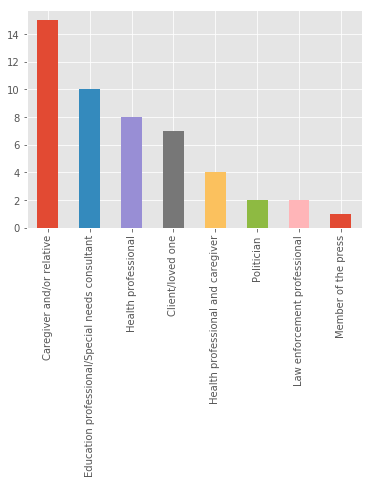

In [3]:
q1 = df[['Please tell us which describes your occupation most closely (what takes up most of your hours in the day).']]
q1 = q1.reset_index().drop(columns='index')
r1 = q1['Please tell us which describes your occupation most closely (what takes up most of your hours in the day).'].value_counts()
r1.plot(kind='bar')



<h1>Question 2</h1>
<br>
<body>
Are there any other mental health support organizations that you rely on for mental illness support?
<br>
<i>Analyis:</i> 


</body>

Results of question 2


Results of question 2 when they provided extra information


['CMHA',
 'CMHA Aurora',
 "Canadian Mental Health (Aurora), Youthdale (CamH downtown TO), Catholic Family Services of Barrie (Partner Abuse Program & SW couple counselling, Southlake Regional Health Centre youth psychiatric dept & team, 310-COPE, 211, Athena's & Women's Abuse Centre (Barrie)",
 'CMHA',
 'camh',
 'Markham stouffville hospital',
 'I found Kasman centre helpful in past.',
 "Just Home on the Hill, that's it.",
 'Cmha',
 'CMHA, Mkm Stouffville hospital ',
 'CAMH, Krassmen, MacKenzie Health',
 'CMHA',
 'camh',
 "I'm in Vancouver and am connected to the BC Schizophrenia Society.",
 'Cmha and yssn',
 "My adult child's psychiatrist.",
 'York Support Services Network for Case Management (have been only able to access when in crisis)']

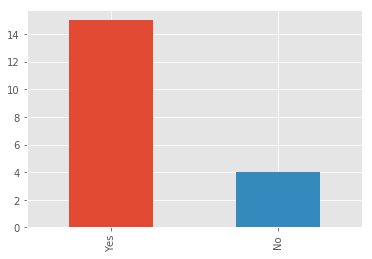

In [4]:
q2 = df[['Are there any other mental health support organizations that you rely on for mental illness support?',
 'What are they?']]
q2 = q2.reset_index().drop(columns='index')
r2 = q2['Are there any other mental health support organizations that you rely on for mental illness support?'].value_counts()
print('Results of question 2')
r2.plot(kind='bar')

r2_bis = q2['What are they?'].dropna()
print('Results of question 2 when they provided extra information')
(r2_bis.values.T.tolist())

<h1>Question 3</h1>
<br>
<body>
From the services that you may have used from Home on the Hill, please rank how likely you would return or use the following services offered by Home on the Hill?
<br>
<i>Analyis:</i> 


</body>

Q3. From the services that you may have used from Home on the Hill, please rank how likely you would return or use the following services offered by Home on the Hill?


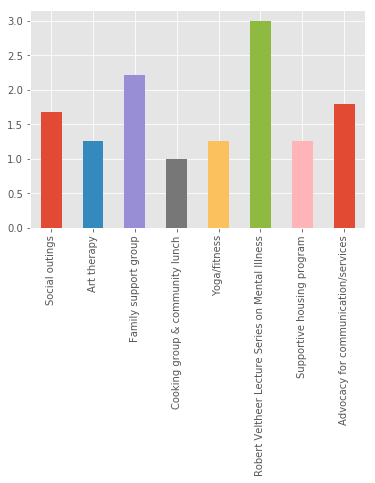

In [5]:
print('Q3. From the services that you may have used from Home on the Hill, please rank how likely you would return or use the following services offered by Home on the Hill?')

q3 = df.iloc[:,9:17]

# get rid of the NaN values and reset the index

q3 = q3.loc[q3.count(1)>3].reset_index().drop(columns='index')

r3 = q3.applymap(transform_likely)
r3 = r3.sum()/r3.count()

r3.plot(kind='bar')


Amount of percent of the respondees answered "Have not used these services"


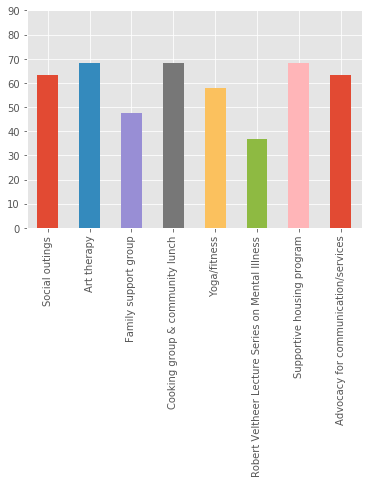

In [6]:
def count_havenotused(x):
    if x == 'Have not used theses services':
        return 1
    else:
        return

r3_bis = q3.applymap(count_havenotused)

print('Amount of percent of the respondees answered "Have not used these services"')
(r3_bis.count()/r3_bis.shape[0]*100).plot(kind='bar',yticks=range(0,100,10))


<h1>Question 4</h1>
<br>
<body>
Please rate the following statements on your perception of the mental health system and supporting organizations in Richmond Hill.<br>
<i>Analysis:</i> 


</body>

,My social support needs as a caregiver are being met.,My emotional well-being needs as a caregiver are being met.,I am able to navigate the mental health system more easily.,Other (please specify)
0,Disagree,Disagree,Disagree,nan
1,I don't know.,I don't know.,I don't know.,nan
2,I don't know.,Disagree,Neither agree or disagree,nan
3,Strongly agree,Strongly agree,Strongly agree,nan
4,Neither agree or disagree,Neither agree or disagree,Neither agree or disagree,There is no public transportation between Richmond Hill and Toronto at night !!!!!!!!!!!!!!!!!!!
5,Neither agree or disagree,Neither agree or disagree,Neither agree or disagree,"We were lucky that places opened up recently. However, initially we had no clue what to do."
6,Agree,Agree,Neither agree or disagree,nan
7,Neither agree or disagree,Neither agree or disagree,Disagree,nan
8,Agree,Agree,Agree,All thanks to Home on the Hill
9,Strongly agree,Neither agree or disagree,Agree,nan


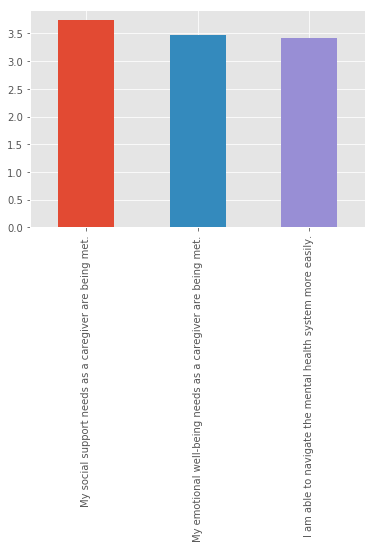

In [7]:
# q4 = df[['My\xa0social support needs as a caregiver are being met.',
# 'My emotional well-being needs as a caregiver are being met.',
# 'I am able to navigate the mental health system more easily.',
# 'Other (please specify)']]

q4 = df.iloc[:,17:21]
q4 = q4.loc[q4.count(1)>2]
q4 = q4.reset_index().drop(columns='index')
q4.style
r4 = q4.iloc[:,0:3].applymap(transform_agree)
(r4.sum(0)/r4.count(0)).plot(kind='bar')

<h1>Question 5</h1>
<br>
<body>
In the last 3 months, please define how frequently you have used the following services offered by Home on the Hill? For example, Almost never=attended 20% of the time; Occasionally/Sometimes=attended 50% of the time; Almost every time=attended 80% of the time.
<br>
<i>Analyis:</i> 


</body>

In [8]:
q5 = df.iloc[:,21:29]

# get rid of the NaN values and reset the index

q5 = q5.loc[q5.count(1)>0]
q5 = q5.reset_index().drop(columns='index')

q5

,Social outings,Art therapy,Family support group,Cooking group & community lunch,Yoga/fitness,Robert Veltheer Lecture Series on Mental Illness,Supportive housing program,Advocacy for communication/ services
0,Never,Never,Never,Never,Never,Never,Never,Never
1,Never,Never,Never,Never,Never,Never,Never,Never
2,Never,Never,Never,Never,Never,Never,Never,Never
3,Never,Never,Never,Never,Never,Occasionally/Sometimes,Never,Occasionally/Sometimes
4,Never,Never,Never,Never,Never,Never,Never,Never
5,Never,Never,Never,Never,Never,Almost never,Never,Never
6,Never,Never,Almost never,Never,Never,Never,Never,Never
7,Never,Never,Never,Never,Never,Almost every time,Never,Occasionally/Sometimes
8,Almost every time,Never,Almost every time,Almost never,Never,Every time,Never,Never
9,Never,Never,Never,Never,Never,Never,Never,Never


<h1>Question 6</h1>
<br>
<body>
In general, please rate the following statements in how you feel about your loved one's illness-specific needs being met.
<br>
<i>Analyis:</i> 


</body>

In [9]:
q6 = df.iloc[:,29:33]

# get rid of the NaN values and reset the index

q6 = q6.loc[q6.count(1)>0]
q6 = q6.reset_index().drop(columns='index')

q6

,There is enough focus on the specific mental illness of my loved one.,There is enough focus on a recovery-oriented system encouraging partnerships with service providers and families.,There is enough focus on mental health promotion - strategies through multi-level interventions for reducing risk factors for poor mental health.,There is enough focus on mental health promotion - strategies for engaging with people to empower them to improve their health.
0,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
1,Neither agree or disagree,Disagree,Disagree,Disagree
2,Disagree,I don't know.,Disagree,Disagree
3,Disagree,Disagree,Disagree,Disagree
4,Disagree,Disagree,Disagree,Disagree
5,Agree,Agree,Disagree,Disagree
6,Neither agree or disagree,Neither agree or disagree,Neither agree or disagree,Neither agree or disagree
7,Disagree,Disagree,Disagree,Disagree
8,Agree,Disagree,Strongly disagree,Strongly disagree
9,Disagree,Disagree,Strongly disagree,Neither agree or disagree


<h1>Question 7</h1>
<br>
<body>
In general, please rate the following statements in how likely you would use the following options for meeting your self-care needs as a caregiver.
<br>
<i>Analyis:</i> 


</body>

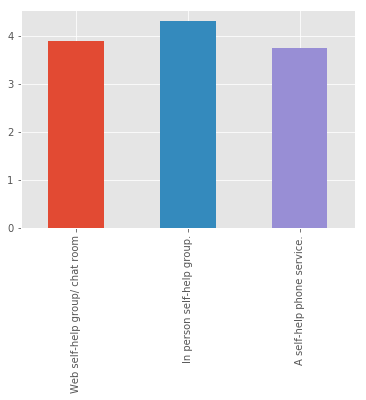

In [10]:
q7 = df.iloc[:,33:37]

# get rid of the NaN values and reset the index

q7 = q7.loc[q7.count(1)>1]
q7 = q7.reset_index().drop(columns='index')

r7 = q7.iloc[:,0:3].applymap(transform_likely)

(r7.sum(0)/r7.count(0)).plot(kind='bar')

<h1>Question 8</h1>
<br>
<body>
By using the drop and drag function of your mouse, please rank the following options which would improve your loved one's self-esteem where 1=most important and 4=least important.
<br>
<i>Analyis:</i> 


</body>

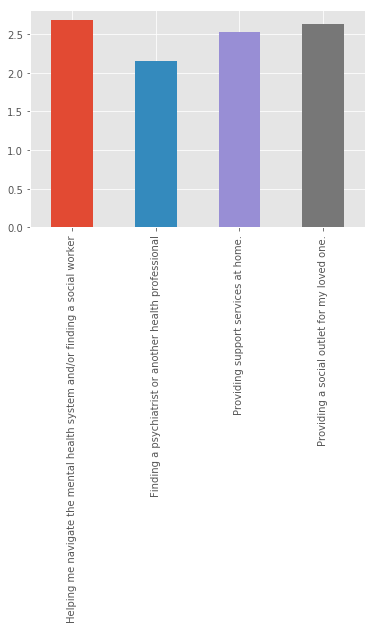

In [11]:
start, end = 37,41

q8 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>1].reset_index().drop(columns='index')

r8 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>1].reset_index().drop(columns='index').applymap(rank_1to4)
(r8.sum(0)/r8.count(0)).plot(kind='bar')

<h1>Question 9</h1>
<br>
<body>
By using the drop and drag function of your mouse, please rank the following options which would improve the sense belonging for your loved one where 1=most important and 5=least important.
<br>
<i>Analyis:</i> 


</body>

value,5st,4st,3st,2st,1st
variable,,,,,
Helping me find friends for my loved one.,3,5,5,4,2
Helping my loved one become more independent.,1,2,9,3,4
Helping my loved one learn new skills.,4,1,1,9,4
Providing more social outings that are fun.,4,7,2,2,4
Providing more support services at home.,7,4,2,1,5


<Figure size 2000x2000 with 0 Axes>

Text(0,0.5,'Amount of times ranked')

Text(0.5,1,'Respondents ranking how we could increase their sense of belonging')

([<matplotlib.axis.XTick at 0x224e89f0cc0>,
 <a list of 5 Text xticklabel objects>)

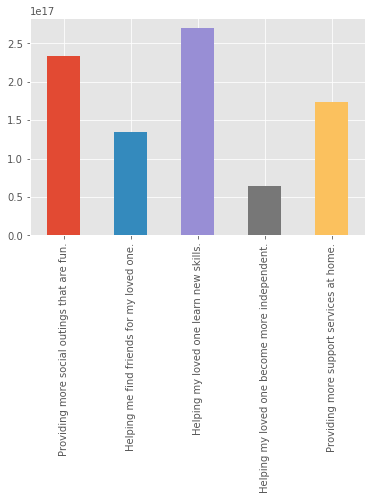

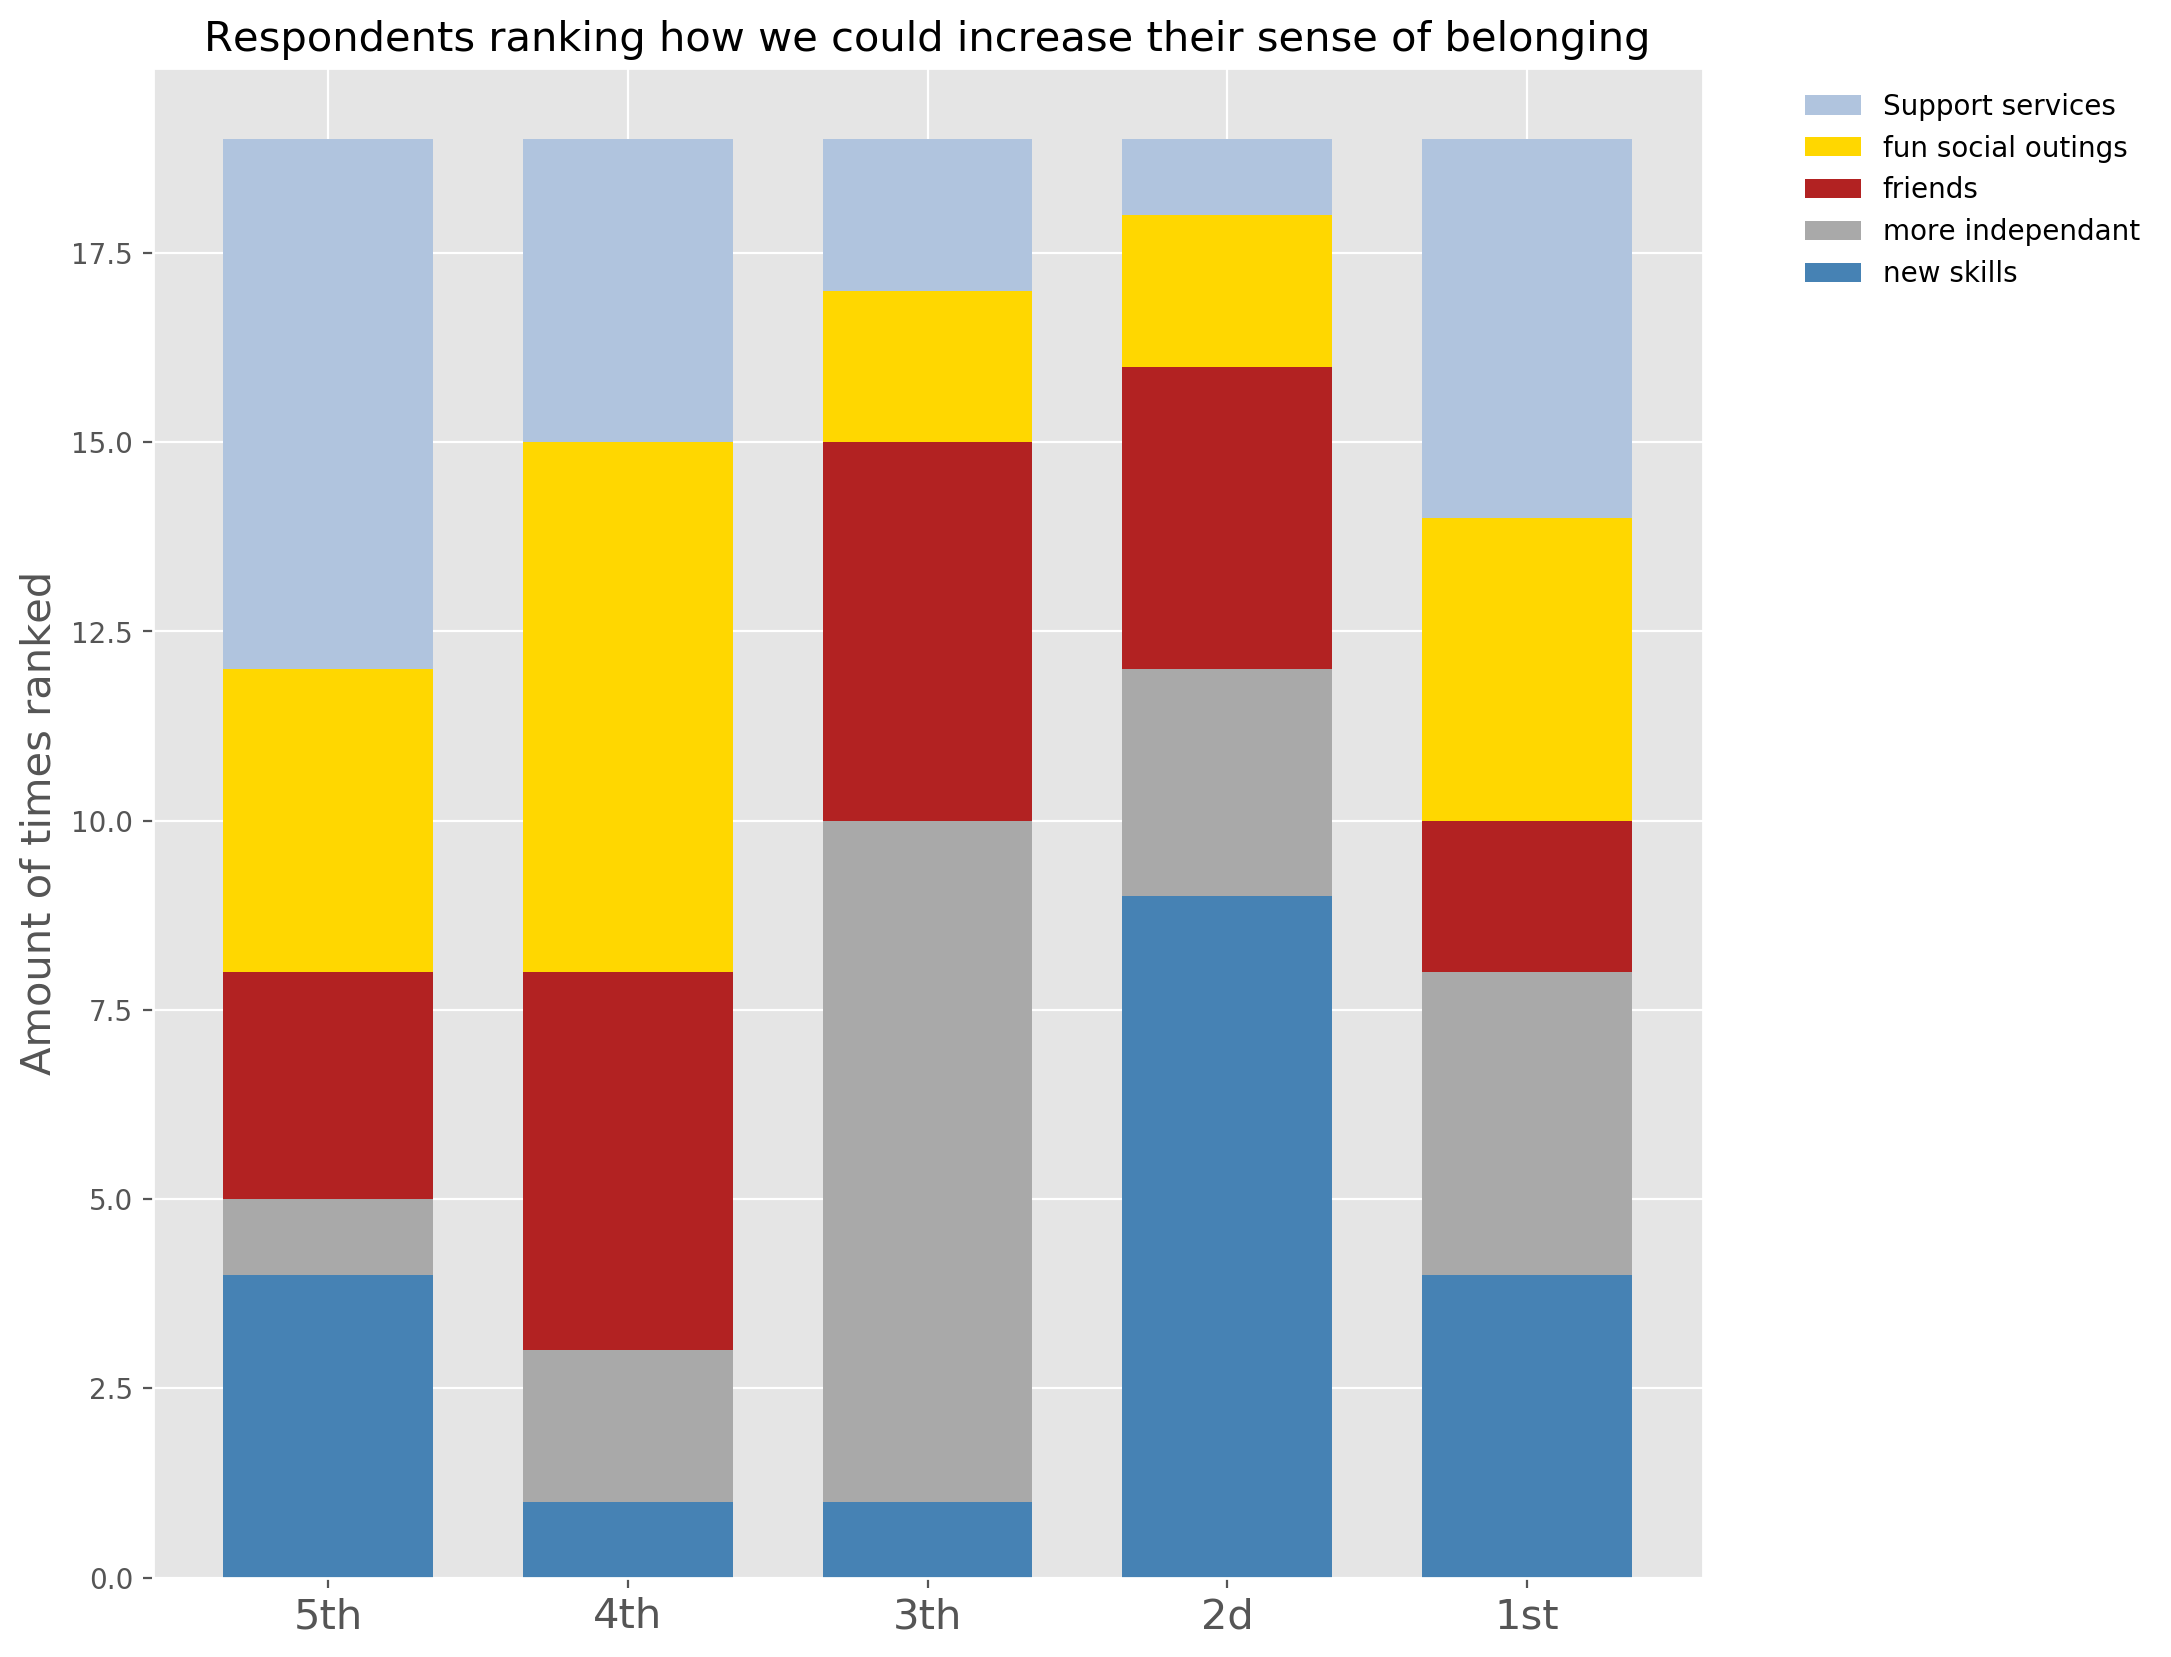

In [12]:
start, end = 41,46

q9 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>1].reset_index().drop(columns='index')
(q9.sum(0)/q9.count(0)).plot(kind='bar')

r9 = pd.crosstab(q9.melt().variable, q9.melt().value).add_suffix('st')
r9 = r9.iloc[:,::-1]
r9

friends = r9.iloc[0]
moreindependant = r9.iloc[1]
newskills = r9.iloc[2]
funsocialoutings = r9.iloc[3]
supportservices = r9.iloc[4]

color= ['steelblue','darkgray','firebrick','gold', 'lightsteelblue']

plt.figure(figsize=(10,10), dpi = 200)
ind = np.arange(r9.shape[0])    # the x locations for the groups
width = 0.7       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, newskills, width, color = color[0],)
p2 = plt.bar(ind, moreindependant , width, color = color[1], 
             bottom= newskills)
p3 = plt.bar(ind, friends, width, color = color[2],
             bottom= newskills + moreindependant)
p4 = plt.bar(ind, funsocialoutings , width, color = color[3],
             bottom= newskills + moreindependant + friends)
p5 = plt.bar(ind, supportservices ,width , color = color[4],
             bottom = newskills + moreindependant + friends + funsocialoutings)

plt.ylabel('Amount of times ranked', fontsize=15)
plt.title('Respondents ranking how we could increase their sense of belonging', fontsize=15)

plt.legend((p5[0], p4[0], p3[0], p2[0], p1[0]), ('Support services','fun social outings','friends','more independant','new skills'),bbox_to_anchor=(1.05, 1), loc=2, frameon=False)

plt.xticks(ind,['5th','4th','3th','2d','1st'], fontsize=15)


<h1>Question 10</h1>
<br>
<body>
For your specific caregiving needs, please rate the following statements in how the following would meet the needs of your loved one.
<br>
<i>Analyis:</i> 


</body>

Harm reduction housing - providing links to support programs/health care workers regardless of whether client is receiving treatment.    4.263158
Supportive housing - housing units with customized services (housing units are customized)                                               4.210526
Semi-independent living - programs focusing on teaching skills for increasing self-esteem and independence.                              4.105263
Supportive housing - housing units with customized services (housing units are not customized)                                           3.842105
Supported housing - long term support housing with services provided to client in their home.                                            3.736842
dtype: float64

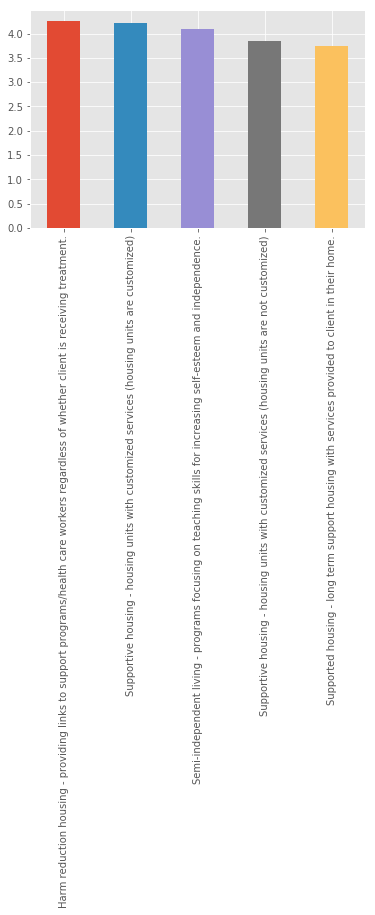

In [13]:
start, end = 46,51

q10 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>1].reset_index().drop(columns='index').applymap(transform_acceptable)
r10 = (q10.sum(0)/q10.count(0))
r10.sort_values(ascending=False)
r10.sort_values(ascending=False).plot(kind='bar', rot=90)

<h1>Question 11</h1>
<br>
<body>
Please indicate the priority of what would be helpful for you to see on Home on the Hill's website?<br>
<i>Analyis:</i> 


</body>

In [14]:
start, end = 51,60
q11 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>1].reset_index().drop(columns='index')
q11

,Navigation mental health system tools,Copies of Robert Veltheer Lecture Series on Mental Illness and/or recordings,Family psycho-education tools,Intervention methods,Medication compliance tools,Link to one stop shop directory,Better site organization,Information about specific mental health disorders,Other (please specify)
0,Not familiar with website,Not familiar with website,Not familiar with website,Not familiar with website,Not familiar with website,Not familiar with website,Not familiar with website,Not familiar with website,NaN
1,Moderate priority,Moderate priority,Moderate priority,Moderate priority,Neutral,Moderate priority,Neutral,Neutral,NaN
2,Essential priority,Neutral,Moderate priority,Essential priority,Moderate priority,Essential priority,Somewhat of a priority,Essential priority,NaN
3,Moderate priority,Moderate priority,Essential priority,Essential priority,Neutral,Neutral,Neutral,Essential priority,NaN
4,Essential priority,Essential priority,Moderate priority,Moderate priority,Neutral,Neutral,Neutral,Essential priority,NaN
5,Essential priority,Moderate priority,Essential priority,Essential priority,Neutral,Not familiar with website,Not familiar with website,Essential priority,NaN
6,Somewhat of a priority,Somewhat of a priority,Somewhat of a priority,Somewhat of a priority,Not a priority,Moderate priority,Neutral,Neutral,NaN
7,Essential priority,Somewhat of a priority,Moderate priority,Moderate priority,Moderate priority,Essential priority,Moderate priority,Moderate priority,NaN
8,Essential priority,Essential priority,Essential priority,Essential priority,Moderate priority,Moderate priority,Neutral,Essential priority,NaN
9,Essential priority,Somewhat of a priority,Essential priority,Essential priority,Essential priority,Essential priority,Essential priority,Moderate priority,NaN


<h1>Question 12</h1>
<br>
<body>
How would you like your skills utilized in contributing to the development of Home on the Hill?
<br>
<i>Analyis:</i> 


</body>

In [15]:
start, end = 60,61
q12 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')
q12

,How would you like your skills utilized in contributing to the development of Home on the Hill?
0,"Editing feedback, if needed; help with Disability paperwork (claims, legal, & other financial backlog)"
1,Richmond Hill is not easily accessible to me !!
2,I just went to one information night. Not interested due to other commitments.
3,not sure
4,"I'm not sure. Maybe it's helpful to share/tell my story with others, a story that includes widespread mental illness within my family, so that it might help others understand and feel less alone in their own situations?"
5,I don’t know. I am certainly available to talk with other caregivers. Lend an ear.
6,"Don't know, but I have lived experience with several family members with mentsl health disorders."
7,Do not see that my skills would help
8,presentation to individuals/groups
9,don't know


<h1>Question 13</h1>
<br>
<body>
How did you first hear of Home on the Hill?
<br>
<i>Analyis:</i> 


</body>

In [16]:
start, end = 61,63
q13 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')
r13 = q13.iloc[:,0:1]
r13

,How did you first hear of Home on the Hill?
0,Through my school/professional organization
1,Through my community centre
2,Through a health care worker
3,Through my school/professional organization
4,Through a friend/family member
5,Through my school/professional organization
6,Through a health care worker
7,Through a newspaper/flyer/bulletin
8,Through a newspaper/flyer/bulletin
9,Through a friend/family member


<h1>Question 14</h1>
<br>
<body>
Please rate how likely you would recommend Home on the Hill to a fellow caregiver?
<br>
<i>Analyis:</i> 


</body>

In [17]:
start, end = 63,64
q14 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')
q14

,Please rate how likely you would recommend Home on the Hill to a fellow caregiver?
0,I don't know.
1,I don't know.
2,Likely
3,Extremely likely
4,Extremely likely
5,Likely
6,Likely
7,Likely
8,Extremely likely
9,Extremely unlikely


<h1>Question 15</h1>
<br>
<body>
 Please tell us which age group you belong to.
<br>
<i>Analyis:</i> 


</body>

In [18]:
start, end = 64,65
q15 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')
q15

,Please tell us which age group you belong to.
0,60 to 69 years old
1,70 to 79 years old
2,40 to 49 years old
3,50 to 59 years old
4,80 to 89 years old
5,50 to 59 years old
6,50 to 59 years old
7,50 to 59 years old
8,50 to 59 years old
9,70 to 79 years old


<h1>Question 16</h1>
<br>
<body>
Please tell us only the first three digits of your postal code.
<br>
<i>Analyis:</i> 


</body>

In [19]:
start, end = 65,66
q16 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')
q16

,Please tell us only the first three digits of your postal code.
0,L4A
1,L3Y
2,L9X
3,l3x
4,m5j
5,L6b
6,L4g
7,L4S
8,L4C
9,L3R


<h1>Question 17</h1>
<br>
<body>
By using drag and drop of your mouse, in order of importance where 1=most important and 4=least important, please rank what is most important to you right now?
<br>
<i>Analyis:</i> 


</body>

In [20]:
start, end = 66,70
q17 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')

r17 = pd.crosstab(q17.melt().variable,q17.melt().value).add_suffix('st')
r17 = r17.iloc[:,::-1]
r17

value,4st,3st,2st,1st
variable,,,,
To become more independent,2,2,1,2
To feel like I belong,2,3,2,0
To feel safe,2,1,0,4
To have better self-esteem,1,1,4,1


<h1>Question 18</h1>
<br>
<body>
 By using drag and drop of your mouse, in order of importance where 1=most important and 5=least important, please rank how can Home on the Hill support you right now?
<br>
<i>Analyis:</i> 


</body>

In [21]:
start, end = 70,75
q18 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')
q18

,To help me find more friends,To help me have fun,To help me become more independent,To help me feel safe.,To help me find help
0,3,4,1,5,2
1,4,2,5,1,3
2,5,2,3,1,4
3,4,5,1,3,2
4,1,3,2,4,5
5,2,5,3,4,1
6,3,2,1,5,4


<h1>Question 19</h1>
<br>
<body>
From the services that you may have used from Home on the Hill, please rank how likely you would return or use the following services offered by Home on the Hill?
<br>
<i>Analyis:</i> 


</body>

In [22]:
start, end = 75,83
q19 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index').applymap(transform_likely)
q19

,Social outings,Art therapy,Family support group,Cooking group and community lunch,Yoga & fitness,Robert Veltheer lecture series on mental illness,Supportive housing program,Advocacy for communication or service
0,0,0,0,0,0,0,0,0
1,5,5,4,3,5,4,5,4
2,1,4,3,3,3,5,3,3
3,4,5,3,5,3,4,5,3
4,1,1,4,3,4,5,5,4
5,0,4,4,4,4,5,0,4
6,5,2,5,2,5,5,4,5


<h1>Question 20</h1>
<br>
<body>
In general, please rate the following statements in how likely you would use the following options for meeting your mental health needs.<br>
<i>Analyis:</i> 


</body>

In [23]:
start, end = 83,87
q20 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')
q20

,Web self-help group/ chat room,In person self-help groups.,A self-help phone service.,Other (please specify)
0,Neutral,Likely,Likely,NaN
1,Unlikely,Likely,Likely,NaN
2,Neutral,Neutral,Neutral,NaN
3,Extremely unlikely,Likely,I don't know.,NaN
4,Likely,Unlikely,Likely,NaN
5,I don't know.,Unlikely,Neutral,NaN
6,Extremely likely,Extremely likely,Extremely likely,NaN


<h1>Question 21</h1>
<br>
<body>
Please indicate the priority of what would be helpful for you to see on Home on the Hill's website?<br>
<i>Analyis:</i> 


</body>

In [24]:
start, end = 87,96
q21 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')
q21

,Navigation mental health system tools,Copies of Robert Veltheer Lecture Series on Mental Illness and/or recordings,Family psycho-education tools,Intervention methods,Medication compliance tools,Link to one stop shop directory,Better site organization,Information about specific mental health disorders,Other (Please specify)
0,Not familiar with website,Not familiar with website,Not familiar with website,Not familiar with website,Not familiar with website,Not familiar with website,Not familiar with website,Not familiar with website,NaN
1,Moderate priority,Moderate priority,Essential priority,Essential priority,Somewhat of a priority,Moderate priority,Moderate priority,Essential priority,NaN
2,Neutral,Essential priority,Essential priority,Neutral,Neutral,Neutral,Neutral,Essential priority,NaN
3,Essential priority,Moderate priority,Essential priority,Essential priority,Essential priority,Moderate priority,Essential priority,Essential priority,NaN
4,Essential priority,Essential priority,Moderate priority,Moderate priority,Neutral,Neutral,Neutral,Essential priority,NaN
5,Essential priority,Somewhat of a priority,Moderate priority,Essential priority,Moderate priority,Moderate priority,Neutral,Moderate priority,NaN
6,Essential priority,Essential priority,Essential priority,Essential priority,Essential priority,Essential priority,Essential priority,Essential priority,NaN


<h1>Question 22</h1>
<br>
<body>
How would you like your skills utilized in contributing to the development of Home on the Hill?
<br>
<i>Analyis:</i> 


</body>

In [25]:
start, end = 96,97
q22 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')
q22

,How would you like your skills utilized in contributing to the development of Home on the Hill?.1
0,The journey of our love one
1,Don’t know


<h1>Question 23</h1>
<br>
<body>
How did you hear of Home on the Hill?
<br>
<i>Analyis:</i> 


</body>

In [26]:
start, end = 97,99
q23 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')
q23

,How did you hear of Home on the Hill?,Other (Please specify)
0,Through a health care worker,asked by CMHA to do the survey - had no knowledge of your organization!
1,Through my community centre,Cmha
2,Through social media,Not sure.
3,Through a friend/family member,NaN
4,Through a health care worker,NaN
5,Through my school/professional organization,NaN
6,Through a newspaper/flyer/bulletin,NaN


<h1>Question 24</h1>
<br>
<body>
Please rate how likely you would recommend Home on the Hill to a fellow loved one?
<br>
<i>Analyis:</i> 


</body>

In [27]:
start, end = 99,100
q24 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')
q24

,Please rate how likely you would recommend Home on the Hill to a fellow loved one?
0,I don't know.
1,Likely
2,Extremely likely
3,Extremely likely
4,Likely
5,Extremely likely
6,Extremely likely


<h1>Question 25</h1>
<br>
<body>
Please tell us which age group you belong to?
<br>
<i>Analyis:</i> 


</body>

In [28]:
start, end = 100,101
q25 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')
q25

,Please tell us which age group you belong to..1
0,18 to 29 years old
1,40 to 49 years old
2,50 to 59 years old
3,30 to 39 years old
4,30 to 39 years old
5,18 to 29 years old
6,60 to 69 years old


<h1>Question 26</h1>
<br>
<body>
Please tell us only the first three digits of your postal code
<br>
<i>Analyis:</i> 


</body>

In [29]:
start, end = 101,102
q26 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')
q26

,Please tell us only the first three digits of your postal code..1
0,L4G
1,L4e
2,L4e
3,L4C
4,2b4
5,L6A
6,L4S


<h1>Question 27</h1>
<br>
<body>
By using drag and drop of your mouse, in your opinion, please rank the following in order where 1=most effective and 4=least effective for the channels that are most effective for Home on the Hill to improve their visibility.
<br>
<i>Analyis:</i> 


</body>

value,4st,3st,2st,1st
variable,,,,
Family Physicians,3,4,10,6
High schools/ universities/ colleges,10,5,4,4
Hospitals,7,7,4,5
Social media,3,7,5,8


<Figure size 2000x2000 with 0 Axes>

Text(0,0.5,'Respondents ranking a channel')

Text(0.5,1,'Ranking of how effective a channel is for HoH to improve their visibility')

([<matplotlib.axis.XTick at 0x224e8c96fd0>,
 <a list of 4 Text xticklabel objects>)

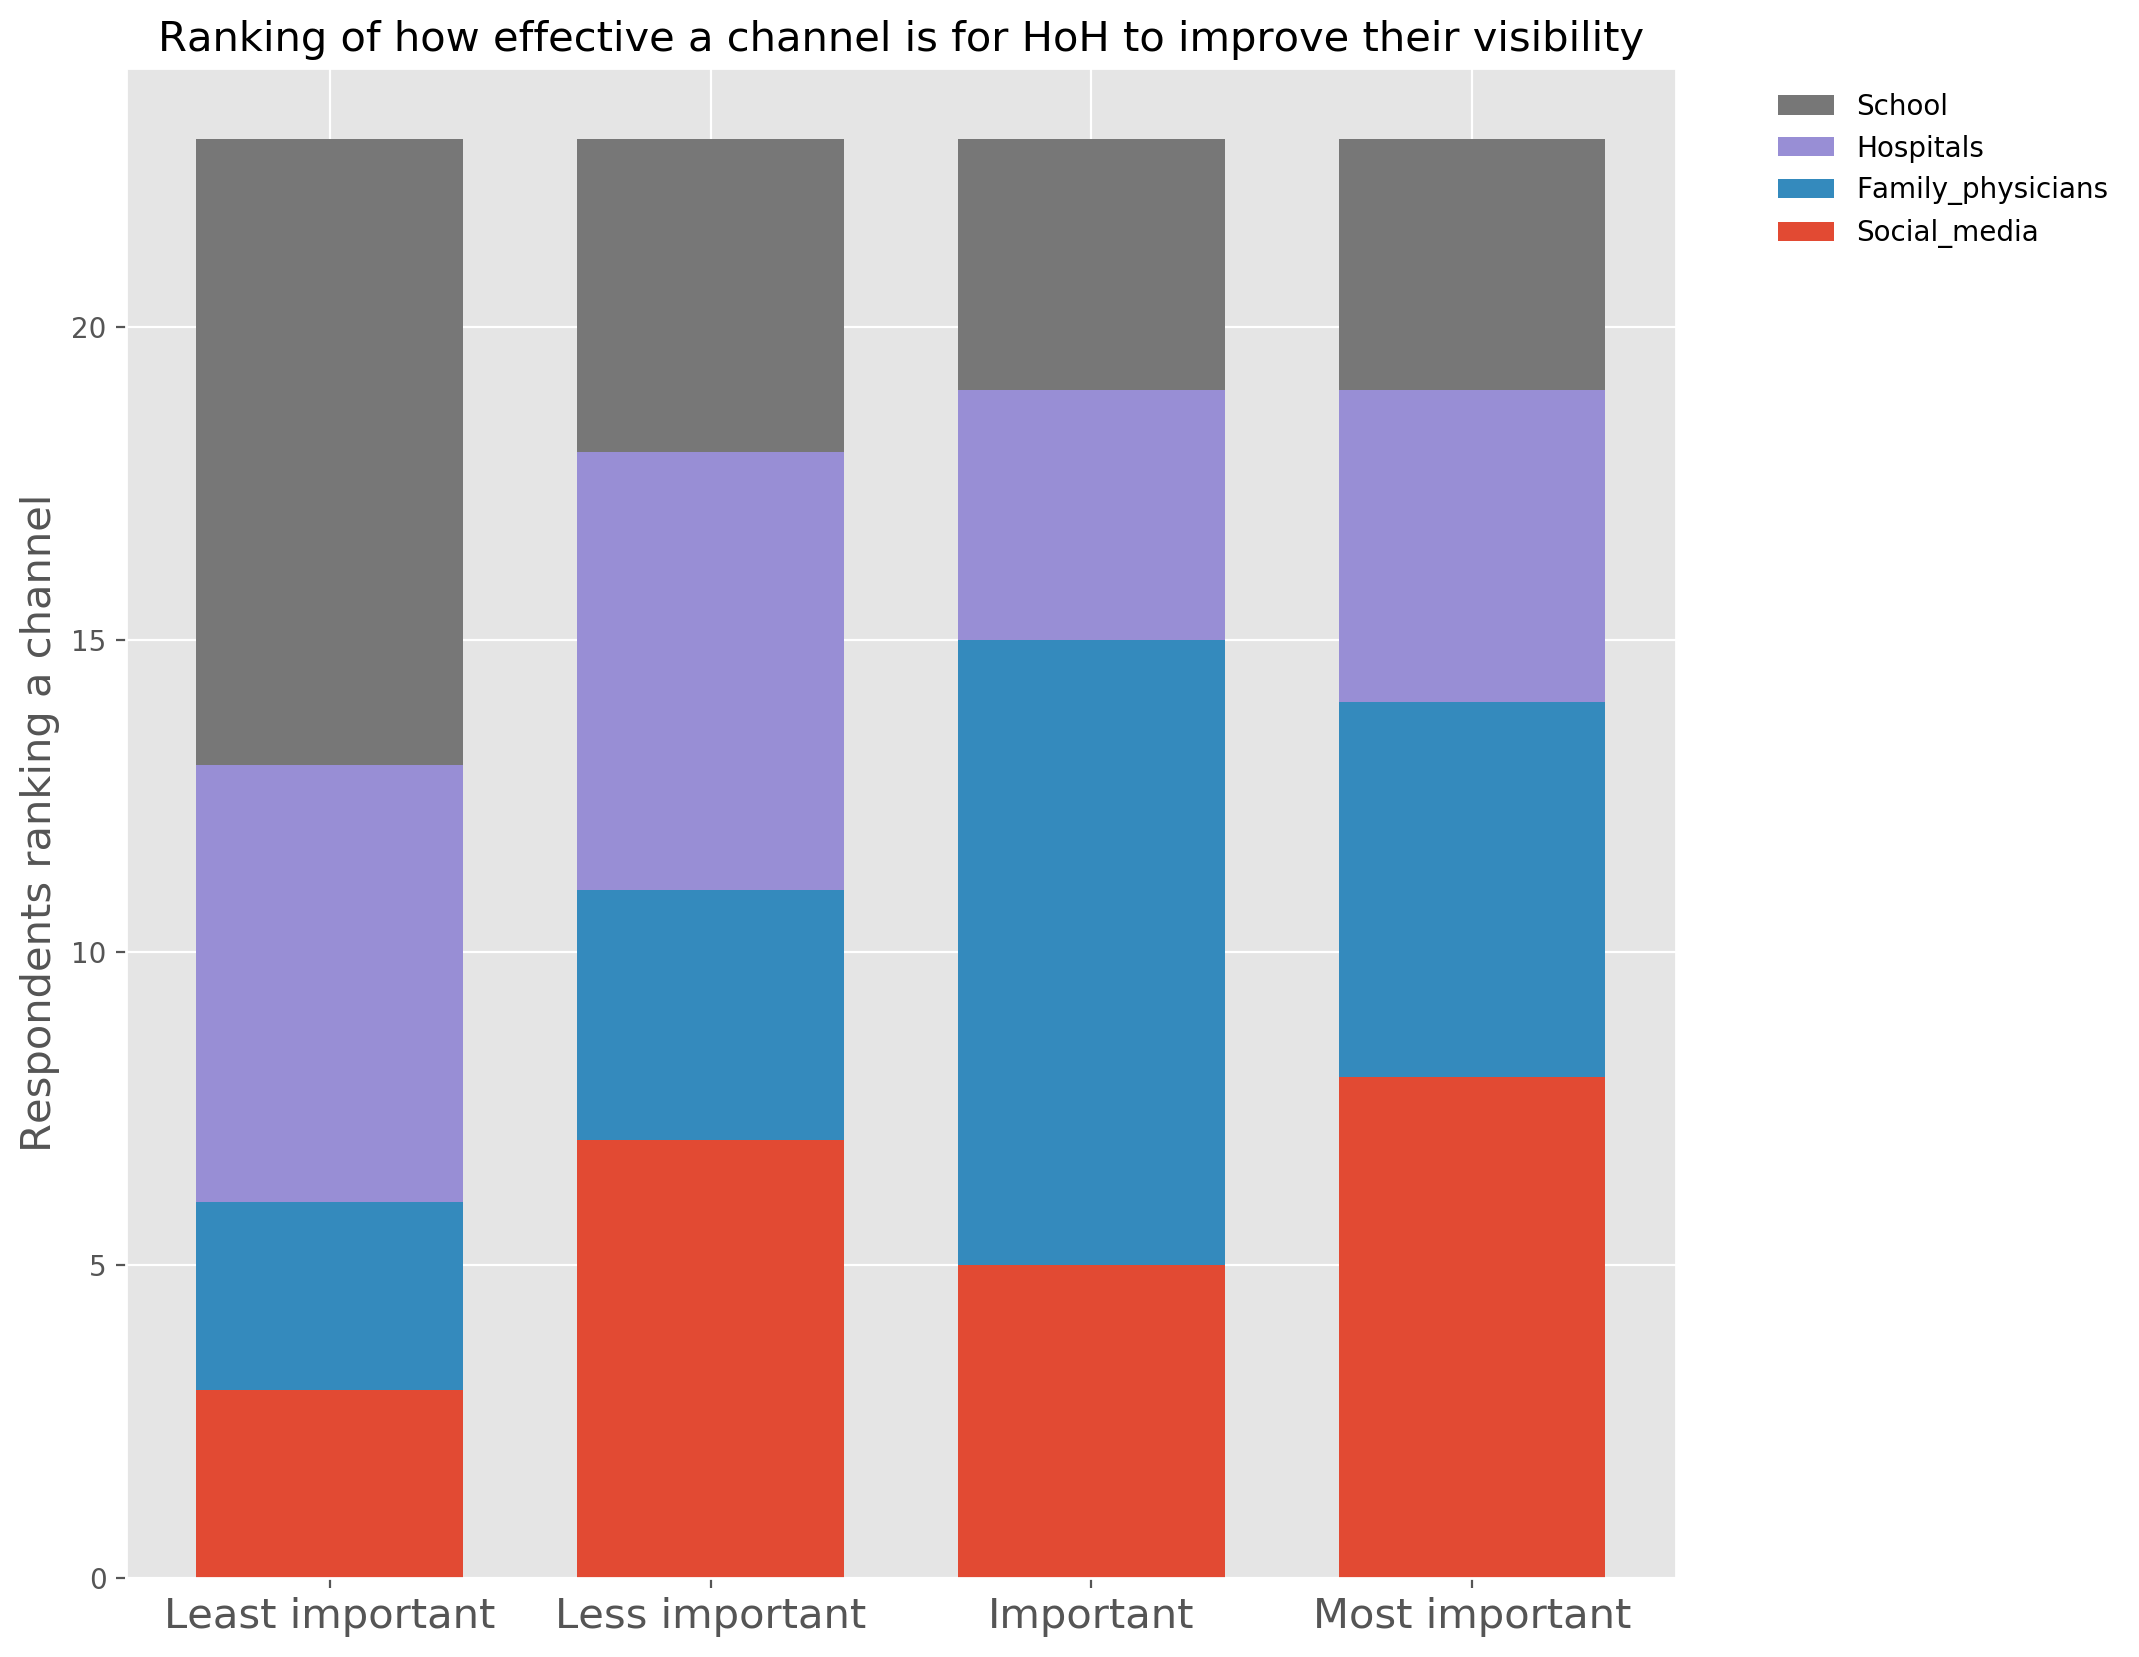

In [30]:
start, end = 102,106
q27 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')

r27 = pd.crosstab(q27.melt().variable,q27.melt().value).add_suffix('st')
r27 = r27.iloc[:,::-1]
r27

Family_physicians = r27.iloc[0]
Social_media = r27.iloc[3]
Schools = r27.iloc[1]
Hospitals = r27.iloc[2]

#color= ['steelblue','darkgray','firebrick','gold']

plt.figure(figsize=(10,10), dpi = 200)
ind = np.arange(r27.shape[0])    # the x locations for the groups
width = 0.7       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, Social_media, width)
p2 = plt.bar(ind, Family_physicians, width, 
             bottom=Social_media)
p3 = plt.bar(ind, Hospitals, width, 
             bottom=Family_physicians + Social_media)
p4 = plt.bar(ind, Schools, width,
             bottom=Family_physicians + Social_media + Hospitals)

plt.ylabel('Respondents ranking a channel', fontsize=15)
plt.title('Ranking of how effective a channel is for HoH to improve their visibility', fontsize=15)

plt.xticks(ind,['Least important','Less important','Important','Most important'], fontsize=15)
plt.legend((p4[0], p3[0], p2[0], p1[0]), ('School','Hospitals','Family_physicians','Social_media'),bbox_to_anchor=(1.05, 1), loc=2, frameon=False)

plt.show()

<h1>Question 28</h1>
<br>
<body>
Please rate the following statements for how mental health organizations could better integrate with the hospital system in Richmond Hill.<br>
<i>Analyis:</i> 


</body>

In [31]:
start, end = 106,111
q28 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')
q28 = q28.applymap(transform_agree)
q28

,Connecting the organization at the point of patient discharge in the event of a hospitalization.,Connecting caregivers to medical professionals in an inclusive circle of care with family members.,Enabling family physicians with early screening tools for mental illness through outreach.,Changing patient confidentiality regulations to enable a more inclusive circle of care for their caregivers.,"An ""in-reach"" program set up by Home on the Hill at the hospital advising participants about various community support programs."
0,4,4,4,2,4
1,5,5,5,4,5
2,2,4,5,4,5
3,5,5,5,4,4
4,5,4,5,4,5
5,4,3,5,1,5
6,5,5,5,4,5
7,5,5,5,5,5
8,4,5,4,5,5
9,5,5,5,5,5


<h1>Question 29</h1>
<br>
<body>
Please rate the following statements for how mental health support organizations could have greater outreach in Richmond Hill.?
<br>
<i>Analyis:</i> 


</body>

In [32]:
start, end = 111,116
q29 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')
q29

,Delivering public awareness campaigns with information about the signs and symptoms of adult-onset mental illness.,Delivering campaigns in high schools and universities with information about the signs and symptoms of adult-onset mental illness.,Delivering campaigns in hospitals about the signs and symptoms of adult-onset mental illness.,Delivering campaigns to family physicians offices about the signs and symptoms of adult-onset mental illness with a caregiving focus.,Delivering campaigns to psychiatrists about managing signs and symptoms of adult-onset mental illness with a caregiving focus.
0,Agree,Agree,Agree,Agree,Agree
1,Agree,Strongly agree,Agree,Strongly agree,Strongly agree
2,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
3,Agree,Agree,I don't know.,Strongly agree,Agree
4,Strongly agree,Strongly agree,Strongly agree,Strongly agree,I don't know.
5,Strongly agree,Agree,Strongly agree,Agree,Agree
6,Agree,Agree,Neither agree or disagree,Agree,Neither agree or disagree
7,I don't know.,I don't know.,I don't know.,Strongly agree,I don't know.
8,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
9,Agree,Agree,Neither agree or disagree,Agree,Neither agree or disagree


<h1>Question 30</h1>
<br>
<body>
What is your perception of effectiveness of outreach by Home on the Hill in the following areas?
<br>
<i>Analyis:</i> 


</body>

In [33]:
start, end = 116,121
q30 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')
q30

,Respite care for caregivers,Support and social programs for ill clients,Advocacy through Robert Veltheer Lecture Series,Supportive housing,Navigation tools for the mental health system in Richmond Hill
0,Moderately effective,Extremely effective,Extremely effective,Extremely effective,Extremely effective
1,Somewhat effective,Somewhat effective,Somewhat effective,Somewhat effective,Somewhat effective
2,Moderately effective,Extremely effective,Somewhat effective,Extremely effective,Moderately effective
3,Somewhat effective,Somewhat effective,Moderately effective,Slightly effective,Somewhat effective
4,Somewhat effective,Moderately effective,Moderately effective,Moderately effective,Moderately effective
5,Moderately effective,Somewhat effective,Moderately effective,Slightly effective,Moderately effective
6,Somewhat effective,Somewhat effective,Somewhat effective,Somewhat effective,Somewhat effective
7,Moderately effective,Extremely effective,Moderately effective,Extremely effective,Extremely effective
8,Moderately effective,Moderately effective,Extremely effective,Moderately effective,Moderately effective
9,Extremely effective,Extremely effective,Moderately effective,Extremely effective,Moderately effective


<h1>Question 31</h1>
<br>
<body>
Home on the Hill is striving to address the gap between the recovery model of the loved ones' right to choose and the medical model of what's the right treatment for them in order to recover. In your opinion, are there any other services we could provide that we are missing?<br>
<i>Analyis:</i> 


</body>

In [34]:
start, end = 121,122
q31 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')
q31

,"Home on the Hill is striving to address the gap between the recovery model of the loved ones right to choose and the medical model of whats the right treatment for them in order to recover. In your opinion, are there any other services we could provide that we are missing?"
0,Unsure what you currently offer
1,"no idea. also, question 4 didn't give me the option of No Idea - I would have chosen that for all my q 4 answers."
2,Having peers talk to the loved one about their journey. In the hospital before discharge. Maybe knowing someone that has been successful would help them want to recover.
3,Housing support with gradual-release support for those with mental illness.
4,not that I can think of
5,respite
6,"Supervision for those individuals who cannot be left alone at home safely, transportation to bring patients to appts (ie therapy)"
7,I personally think you are doing the best you can at this time.
8,"I cannot comment on the questions in number 4 as I just don't know since I don't live in Richmond Hill - I have attended a lecture and it was very informative so I am sure they are very helpful. I filled in the circles in #4 as the survey required them to be filled in - there should be an option when one doesn't know. For #5, I'm not sure - the above gap mentioned is extremely important - I live outside of Richmond Hill so cannot really comment accurately on the effectiveness of Home on the Hill in Richmond Hill or what is missing in the way of services. It is wonderful that Home on the Hill is striving to do something in the way of supports for individuals and families - I would love to see something more in the Markham area - I find it difficult to find out what is available in this area for caregiver supports and for my family member who has mental health struggles."
9,educating law enforcers


<h1>Question 32</h1>
<br>
<body>
How did you hear of Home on the Hill?
<br>
<i>Analyis:</i> 


</body>

In [35]:
start, end = 122,124
q31 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')
q31

,How did you hear of Home on the Hill?.1,Other (Please specify)
0,Through a health care worker,NaN
1,Through social media,NaN
2,I haven't heard of this organization,Support group through CHMA
3,Through a friend/family member,NaN
4,Through social media,I
5,Through a newspaper/flyer/bulletin,NaN
6,I haven't heard of this organization,I heard of the opportunity from Indeed
7,Through my school/professional organization,"I work for Community living your south, we keep families informed on their options we work closely with Home On the Hil"
8,Through a newspaper/flyer/bulletin,I attended the Krasman Centre family support group for a period of time when Home on the Hill was just an idea! I found the Krasman Centre in a directory on the coffee table in my dentist's office.
9,Through my school/professional organization,NaN


<h1>Question 33</h1>
<br>
<body>
Please rate how likely you would recommend Home on the Hill to a fellow professional?
<br>
<i>Analyis:</i> 


</body>

In [36]:
start, end = 124,125
q33 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')
q33

,Please rate how likely you would recommend Home on the Hill to a fellow professional?
0,Likely
1,Likely
2,I don't know.
3,Extremely likely
4,Extremely likely
5,Likely
6,Likely
7,Extremely likely
8,Extremely likely
9,Likely


<h1>Question 34</h1>
<br>
<body>
Please tell us your level of professional experience.
<br>
<i>Analyis:</i> 

</body>

In [37]:
start, end = 125,127
q34 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')
q34

,Please tell us your level of professional experience.,Please tell us the industry/organization where you work:
0,15 to 25 years,Healthcare
1,15 to 25 years,education
2,Less than 5 years,"RNS regional nursing service, PSW"
3,10 to 15 years,Education
4,Over 25 years,physician retired
5,15 to 25 years,"legal, governance"
6,15 to 25 years,Mental Health hospital
7,15 to 25 years,Community Living York South
8,10 to 15 years,I have been an elementary school teacher but currently work in a school office.
9,Over 25 years,Policing


<h1>Question 35</h1>
<br>
<body>
Please tell us only the first three digits of your postal code.
<br>
<i>Analyis:</i> 


</body>

In [38]:
start, end = 127,128
q35 = df.iloc[:,start:end].loc[df.iloc[:,start:end].count(1)>0].reset_index().drop(columns='index')
q35

,Please tell us only the first three digits of your postal code..
0,L4C
1,L6A
2,L4E
3,L4C
4,M3B
5,L3P
6,L1R
7,L4C
8,L3P
9,L4G
